In [1]:
# Import modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

In [2]:
# Load the CSV file
csv_file = Path("Dataset/salaries.csv")
salaries_df = pd.read_csv(csv_file)

# Display sample data
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [3]:
# Check for missing data
salaries_df.count()

work_year             3006
experience_level      3006
employment_type       3006
job_title             3006
salary                3006
salary_currency       3006
salary_in_usd         3006
employee_residence    3006
remote_ratio          3006
company_location      3006
company_size          3006
dtype: int64

In [4]:
# Identify type of data
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
# Select companies locate in US
us_df = salaries_df.loc[salaries_df["company_location"]=="US",:]
us_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [6]:
###Job Title
#Identify the job title in demand and the salaries being paid for the professions



In [7]:
# job demand in percentage
job = us_df["job_title"].value_counts()
job_df= pd.DataFrame(job)
sum_job=job_df.sum()
job_df["demand_percent"]=round(job_df["job_title"]/(sum_job[0])*100, 2)
job_df


,job_title,demand_percent
Data Engineer,702,29.47
Data Scientist,536,22.50
Data Analyst,413,17.34
Machine Learning Engineer,177,7.43
Data Architect,75,3.15
...,...,...
Data Scientist Lead,1,0.04
Data Science Tech Lead,1,0.04
Principal Machine Learning Engineer,1,0.04
Applied Machine Learning Engineer,1,0.04


In [8]:
# lack of data - job types only have one sample
lack_data = job_df.loc[job_df["job_title"]==1,:]
lack_data

,job_title,demand_percent
Cloud Data Engineer,1,0.04
Principal Data Analyst,1,0.04
Big Data Engineer,1,0.04
Director of Data Engineering,1,0.04
Manager Data Management,1,0.04
Data Analytics Lead,1,0.04
Machine Learning Developer,1,0.04
Cloud Data Architect,1,0.04
Data Scientist Lead,1,0.04
Data Science Tech Lead,1,0.04


In [9]:
# job salary for all
salary=us_df.groupby("job_title")["salary_in_usd"].mean()
salary_df=pd.DataFrame(salary)
salary_df["salary_in_usd"]=salary_df["salary_in_usd"].map("${:,.2f}".format)
job_df["job"]=job.index
job_df.sort_values("job",ascending=False)
salary_df["demand_percent (%)"]=job_df["demand_percent"]
salary_demand=salary_df.sort_values("demand_percent (%)",ascending=False)
salary_demand

,salary_in_usd,demand_percent (%)
job_title,,
Data Engineer,"$153,756.59",29.47
Data Scientist,"$154,808.40",22.50
Data Analyst,"$115,675.57",17.34
Machine Learning Engineer,"$169,205.55",7.43
Data Architect,"$160,782.81",3.15
...,...,...
Cloud Data Architect,"$250,000.00",0.04
Director of Data Engineering,"$200,000.00",0.04
Machine Learning Developer,"$180,000.00",0.04


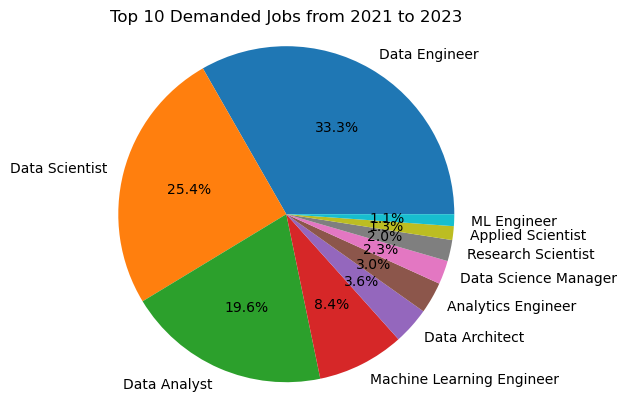

In [11]:
# demand (Top 10) via pie chart
top_job=np.arange(0,10,1)
top_job_df=job_df.iloc[top_job]
label=top_job_df.index
plt.pie(top_job_df["job_title"], labels=label,autopct="%1.1f%%")
plt.title("Top 10 Demanded Jobs from 2021 to 2023")
plt.axis("equal")
plt.show()

Text(0.5, 1.0, 'Top 10 Demanded Jobs from 2020 to 2023')

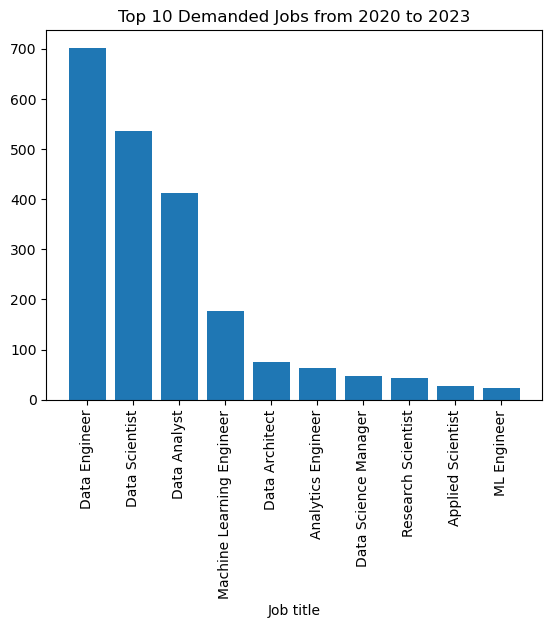

In [25]:
# demand (Top 10) via bar chart
plt.bar(top_job_df.index, top_job_df["job_title"])
plt.xticks(top_job_df.index, rotation=90)
plt.xlabel("Job title")
plt.title("Top 10 Demanded Jobs from 2020 to 2023")

In [39]:
# Calculate mean, median mode variance standard deviation and sem
jobs=[]
for x in top_job:
    jobs.append(top_job_df["job"][x])
jobs

jobs_df=us_df.loc[(us_df["job_title"]==jobs[0])|(us_df["job_title"]==jobs[1])|
                  (us_df["job_title"]==jobs[2])|(us_df["job_title"]==jobs[3])|
                  (us_df["job_title"]==jobs[4])|(us_df["job_title"]==jobs[5])|
                  (us_df["job_title"]==jobs[6])|(us_df["job_title"]==jobs[7])|
                  (us_df["job_title"]==jobs[8])|(us_df["job_title"]==jobs[9])]

def calculate_mode(x):
    from statistics import mode
    try:
        return mode(x)
    except statistics.StatisticsError:
        return None

# Group by 'job_title' and calculate various statistics including mode
stats_salary = jobs_df.groupby("job_title").agg(
    mean_salary=('salary_in_usd', 'mean'),  # Rename 'mean' column
    mode_salary=('salary_in_usd', calculate_mode),
    median_salary=('salary_in_usd', 'median'),
    var_salary=('salary_in_usd', 'var'),
    std_salary=('salary_in_usd', 'std'),
    sem_salary=('salary_in_usd', 'sem')
).reset_index()    

# Sort the DataFrame by the 'mean_salary' column in descending order
stats_salary_sorted = stats_salary.sort_values(by='mean_salary', ascending=False)
stats_salary_sorted


,job_title,mean_salary,mode_salary,median_salary,var_salary,std_salary,sem_salary
5,Data Science Manager,197857.020833,299500,189850.0,3.693674e+09,60775.602514,8772.202618
1,Applied Scientist,190614.285714,184000,191737.5,2.419577e+09,49189.194664,9295.884019
7,ML Engineer,186392.875000,220000,190200.0,3.179686e+09,56388.704530,11510.296113
9,Research Scientist,184586.046512,150000,165750.0,5.824317e+09,76317.213409,11638.265937
8,Machine Learning Engineer,169205.553672,204500,163800.0,2.138294e+09,46241.687150,3475.738047
3,Data Architect,160782.813333,180000,160000.0,2.471088e+09,49710.042938,5740.021334
6,Data Scientist,154808.397388,191475,149925.0,2.445478e+09,49451.778793,2135.991514
4,Data Engineer,153756.589744,160000,145500.0,2.955407e+09,54363.651227,2051.823793
0,Analytics Engineer,153616.406250,130000,150000.0,2.249841e+09,47432.485900,5929.060737
2,Data Analyst,115675.573850,100000,110600.0,1.668131e+09,40842.754654,2009.740571


In [14]:
###
# Summary: 
#       According to the results, top 10 jobs in demand are plot into a bar chart and accoding to the pie chart, we can find data analyst, 
# data scientist and data engineer takes over 75% of job in demand. While some job titles are lack of samples.
# The salary paid to them is showed in a data frame, data science mananger earns the most while data analyst paid the least.
    

In [15]:
#Average Salary for top 3 job in 4 years
# Determine change of average salary for the 3 most in demand job titles over the 4 years

In [16]:
#top 3 jobs
job_1 = salary_demand.index[0]
job_2 = salary_demand.index[1]
job_3 = salary_demand.index[2]

#create line chart for salavry and years
def timeline(x):
    job_selected=us_df.loc[us_df["job_title"]==x,:]
    year=job_selected.groupby("work_year")["salary_in_usd"].mean()
    year_df=pd.DataFrame(year)
    years=year_df.index

    return (plt.plot(years,year_df["salary_in_usd"], label=x),
            plt.xticks(np.arange(min(years), max(years)+1, 1.0)),
            plt.xlabel("Year"),
            plt.ylabel("Salary ($)"),
            plt.grid())
    

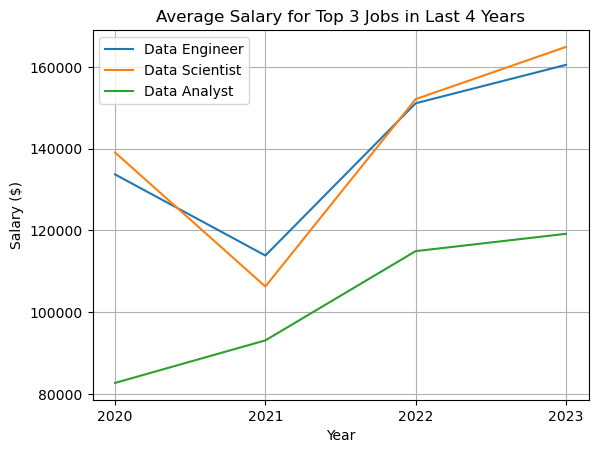

In [17]:
timeline(job_1)
timeline(job_2)
timeline(job_3)
plt.title("Average Salary for Top 3 Jobs in Last 4 Years")
plt.legend()

In [40]:
#create line chart for remote ratio and year
def timeline_r(x):
    job_selected=us_df.loc[us_df["job_title"]==x,:]
    year=job_selected.groupby("work_year")["remote_ratio"].mean()
    year_df=pd.DataFrame(year)
    years=year_df.index

    return (plt.plot(years,year_df["remote_ratio"], label=x),
            plt.xticks(np.arange(min(years), max(years)+1, 1.0)),
            plt.xlabel("Year"),
            plt.ylabel("Remote Ratio (%)"),
            plt.grid())

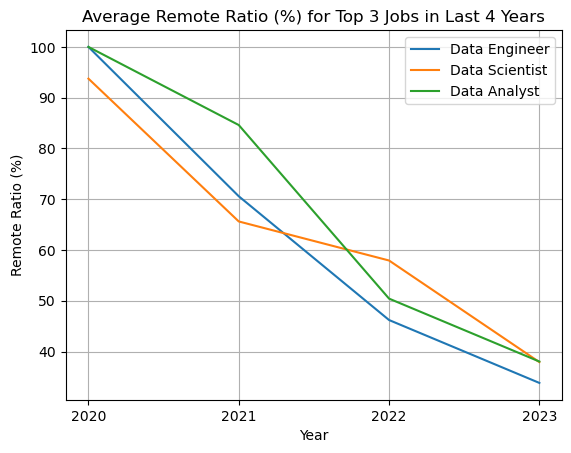

In [49]:
timeline_r(job_1)
timeline_r(job_2)
timeline_r(job_3)
plt.legend()
plt.title("Average Remote Ratio (%) for Top 3 Jobs in Last 4 Years")
plt.legend()

Text(0.5, 1.0, 'Average Salary for Top 3 Jobs in Last 4 Years')

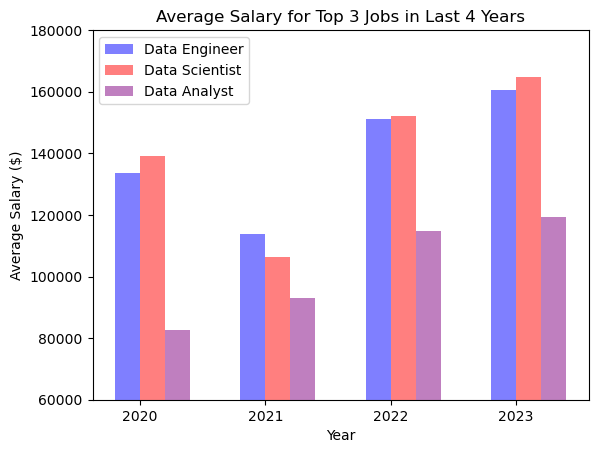

In [18]:
# bar chart for top 3 job in last 4 years
top_1 =us_df.loc[us_df["job_title"]==job_1,:].groupby(["work_year"])["salary_in_usd"].mean()
top_1_df=pd.DataFrame(top_1)
x = top_1_df.index

top_2 =us_df.loc[us_df["job_title"]==job_2,:].groupby(["work_year"])["salary_in_usd"].mean()
top_2_df=pd.DataFrame(top_2)

top_3 =us_df.loc[us_df["job_title"]==job_3,:].groupby(["work_year"])["salary_in_usd"].mean()
top_3_df=pd.DataFrame(top_3)

x_axis = np.arange(len(x))
plt.bar(x_axis - 0.1, top_1_df["salary_in_usd"],0.2, label=job_1, alpha=0.5, color="b")
plt.bar(x_axis + 0.1, top_2_df["salary_in_usd"],0.2, label=job_2, alpha=0.5,color="r")
plt.bar(x_axis + 0.3, top_3_df["salary_in_usd"],0.2, label=job_3, alpha=0.5,color="purple")
plt.xticks(x_axis, x)
plt.xlabel("Year")
plt.ylabel("Average Salary ($)")
plt.legend()
plt.ylim(60000, 180000)
plt.title("Average Salary for Top 3 Jobs in Last 4 Years")

In [19]:
# calculate size of sample for each year
def lens(x,y):
    year_1=us_df.loc[(us_df["job_title"]==x)&(us_df["work_year"]==y),:]
    year_2=us_df.loc[(us_df["job_title"]==x)&(us_df["work_year"]==(y+1)),:]
    year_3=us_df.loc[(us_df["job_title"]==x)&(us_df["work_year"]==(y+2)),:]
    year_4=us_df.loc[(us_df["job_title"]==x)&(us_df["work_year"]==(y+3)),:]
    lens1=len(year_1["salary"])
    lens2=len(year_2["salary"])
    lens3=len(year_3["salary"])
    lens4=len(year_4["salary"])
    print(f"2020: {lens1}, 2021: {lens2}, 2022: {lens3}, 2023: {lens4}")
    

In [20]:
lens(job_2,2020)
lens(job_1, 2020)
lens(job_3,2020)

2020: 8, 2021: 16, 2022: 334, 2023: 178
2020: 4, 2021: 17, 2022: 409, 2023: 272
2020: 3, 2021: 13, 2022: 234, 2023: 163


Text(0.5, 1.0, 'Salary for Top 3 Job in 2022')

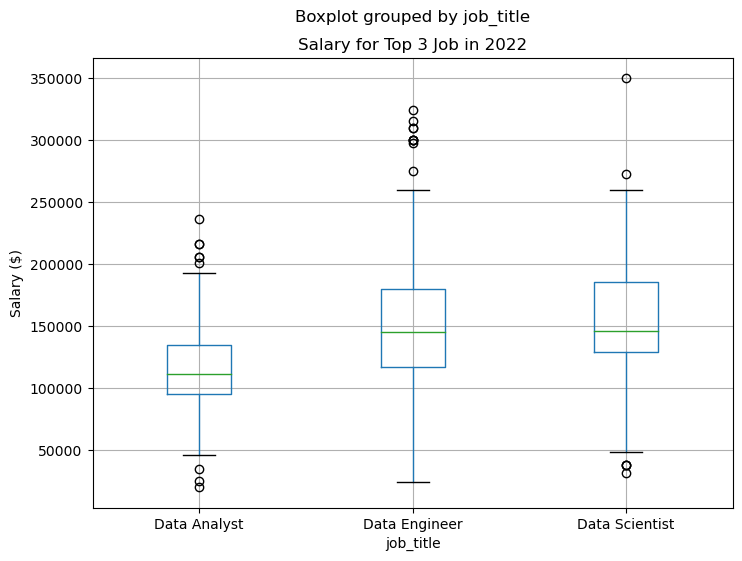

In [21]:
##  compare salary for three kinds of jobs but in a same year via boxplot 
#2022
salary_22 = us_df.loc[(us_df["job_title"]==job_1)&(us_df["work_year"]==2022)
                      |(us_df["job_title"]==job_2)&(us_df["work_year"]==2022)
                      |(us_df["job_title"]==job_3)&(us_df["work_year"]==2022)]


salary_22.boxplot("salary_in_usd", by="job_title", figsize=(8, 6))
plt.ylabel("Salary ($)")
plt.title("Salary for Top 3 Job in 2022")




In [22]:
# normal distribution test for three groups
def normal(x):
    job_2022=us_df.loc[us_df["job_title"]==x,:]["salary_in_usd"]
    print(st.normaltest(job_2022.sample(200)))
normal(job_1)
normal(job_2)
normal(job_3)

NormaltestResult(statistic=10.336642282931448, pvalue=0.005694120421746642)
NormaltestResult(statistic=40.334758621537716, pvalue=1.7434859457798346e-09)
NormaltestResult(statistic=18.868129943323016, pvalue=7.995352963238391e-05)


In [23]:
# kruskal-wallis test
group1=us_df.loc[us_df["job_title"]==job_1,:]["salary_in_usd"]
group2=us_df.loc[us_df["job_title"]==job_2,:]["salary_in_usd"]
group3=us_df.loc[us_df["job_title"]==job_3,:]["salary_in_usd"]

statistic, p_value = kruskal(group1, group2, group3)
statistic, p_value

(197.49541785680861, 1.301412314244618e-43)

In [ ]:
# Summary: 
# Overall, the average salary for top 3 jobs increases for the last four years. Data scientist and data engineer have similar trend. 
# However, if we compare the whole data by the boxplot, data engineer and data scientist share a similar range and central value (median)
# A p value of kruskal test shows siginificant difference between salary of top 3 jobs in 2022
# The remote ratio decreases from 2020 to 2023